In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import product
from perlin_numpy import generate_perlin_noise_2d
from scipy.interpolate import griddata
from scipy.spatial.distance import cdist
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer

In [87]:
np.random.seed(0)

xyz_range = ((-1, 1), (-1, 1), (-1, 1))

m = 100
n = 1000

iterations = 10

laplace_alpha = 0

model = "fast"

gan_args = ModelParameters(
    batch_size=25,
    lr=0.0002,
    betas=(0.5, 0.9)
)

train_args = TrainParameters(
    epochs=500
)

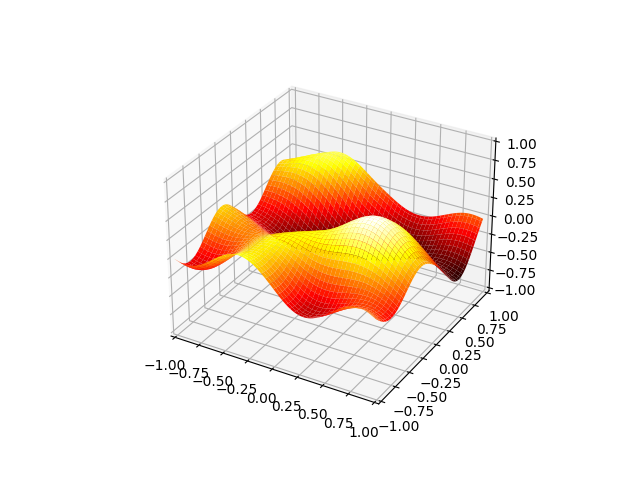

In [88]:
%matplotlib widget

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(*xyz_range[0], ((xyz_range[0][1] - xyz_range[0][0]) / 100))
Y = np.arange(*xyz_range[1], ((xyz_range[1][1] - xyz_range[1][0]) / 100))
X, Y = np.meshgrid(X, Y)
Z = generate_perlin_noise_2d((100, 100), (2, 2))

ax.plot_surface(X, Y, Z, cmap="hot")

ax.set_xlim(*xyz_range[0])
ax.set_ylim(*xyz_range[1])
ax.set_zlim(*xyz_range[2])

plt.show()

In [89]:
df = pd.DataFrame(np.random.randint(100, size=(m * iterations, 2)))

df.columns = ["i", "j"]

df["x"] = X[0, df["i"]]
df["y"] = Y[df["j"], 0]
df["z"] = Z[df["i"], df["j"]]

In [90]:
synth = RegularSynthesizer(modelname=model, model_parameters=gan_args)

if model == "fast":
    synth.fit(data=df[["x", "y", "z"]], cat_cols=[], num_cols=["x", "y", "z"])
elif model == "gan":
    synth.fit(data=df[["x", "y", "z"]], cat_cols=[], num_cols=["x", "y", "z"], train_arguments=train_args)

synth_df = synth.sample(n)

Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]


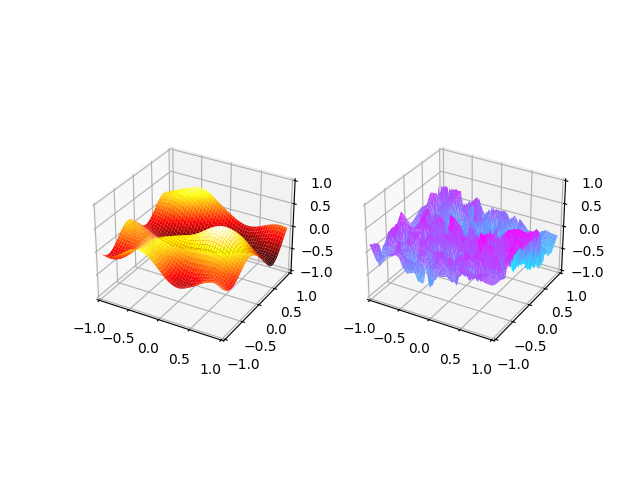

In [91]:
%matplotlib widget

fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

z = griddata((synth_df["x"], synth_df["y"]), synth_df["z"], (X.T, Y.T), method="linear", fill_value=0)

axs[0].plot_surface(X, Y, Z, cmap="hot")
axs[1].plot_surface(X, Y, z, cmap="cool")

axs[0].set_xlim(*xyz_range[0])
axs[0].set_ylim(*xyz_range[1])
axs[0].set_zlim(*xyz_range[2])
axs[1].set_xlim(*xyz_range[0])
axs[1].set_ylim(*xyz_range[1])
axs[1].set_zlim(*xyz_range[2])

plt.show()

In [92]:
df = pd.DataFrame()

for idx in range(1, iterations + 1):
    print("iter:", idx)

    z = griddata((synth_df["x"], synth_df["y"]), synth_df["z"], (X.T, Y.T), method="linear", fill_value=0)

    tmp_df = pd.DataFrame(list(product(range(100), range(100))), columns=["i", "j"])

    tmp_df["x"] = X[0, tmp_df["i"]]
    tmp_df["y"] = Y[tmp_df["j"], 0]
    tmp_df["z"] = Z[tmp_df["i"], tmp_df["j"]]

    p = np.abs(Z[tmp_df["i"], tmp_df["j"]] - z[tmp_df["i"], tmp_df["j"]]) + laplace_alpha

    p /= p.sum()

    tmp_df = tmp_df.loc[np.random.choice(tmp_df.index, size=m, p=p, replace=False)]

    df = pd.concat([df, tmp_df], ignore_index=True)

    if model == "fast":
        synth.fit(data=df[["x", "y", "z"]], cat_cols=[], num_cols=["x", "y", "z"])
    elif model == "gan":
        synth.fit(data=df[["x", "y", "z"]], cat_cols=[], num_cols=["x", "y", "z"], train_arguments=train_args)

    synth_df = synth.sample(n)

iter: 1


Hyperparameter search: 100%|██████████| 8/8 [00:00<00:00, 26.77it/s]


iter: 2


Hyperparameter search: 100%|██████████| 8/8 [00:00<00:00, 13.80it/s]


iter: 3


Hyperparameter search: 100%|██████████| 8/8 [00:00<00:00, 10.16it/s]


iter: 4


Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]


iter: 5


Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]


iter: 6


Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  6.96it/s]


iter: 7


Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]


iter: 8


Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]


iter: 9


Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


iter: 10


Hyperparameter search: 100%|██████████| 8/8 [00:01<00:00,  4.82it/s]


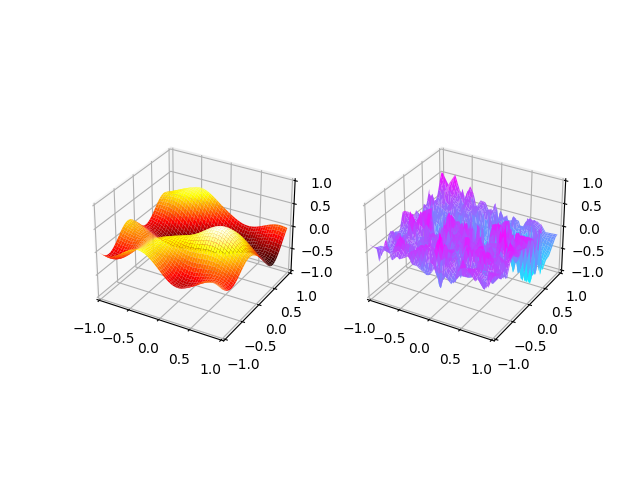

In [93]:
%matplotlib widget

fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

z = griddata((synth_df["x"], synth_df["y"]), synth_df["z"], (X.T, Y.T), method="linear", fill_value=0)

axs[0].plot_surface(X, Y, Z, cmap="hot")
axs[1].plot_surface(X, Y, z, cmap="cool")

axs[0].set_xlim(*xyz_range[0])
axs[0].set_ylim(*xyz_range[1])
axs[0].set_zlim(*xyz_range[2])
axs[1].set_xlim(*xyz_range[0])
axs[1].set_ylim(*xyz_range[1])
axs[1].set_zlim(*xyz_range[2])

plt.show()